# Projeto WPT - Wireless Power Transfer - Etapa 2

- **Grupo**: Eduardo Vescovi, Gustavo Guedes, Lucas Teixeira e Luiz Ricardo Paranhos
- **Turma**: 4MMA
- **Professor**: Carlos Marmo
- **Disciplina**: Eletromagnetismo e Ondulatória

## Índice

- [Introdução e objetivos](#intro)

- [Diagrama do modelo eletrodinâmico do WPT](#diagrama)

- [Declaração de parâmetros do sistema](#declara)

- [Código do modelo numérico](#codigo)

- [Construção de gráficos de pico de corrente](#corr)

- [Construção de gráficos de potência e eficiência](#pot)

- [Gráficos adicionais](#add)

- [Gráficos de validação pós-experimento](#valid)

- [Conclusão](#conclusao)

- [Referências](#referencias)

## Introdução e objetivos
<div id="intro"></div>

> O **Wireless Power Transfer** (WPT), ou Transferência de Potência via Wireless, é um sistema de transmissão de energia elétrica sem o uso de fios. A transferência da energia ocorre por meio de um campo magnético variante no tempo, que é gerado por um circuito transmissor e recebido por um dispositivo receptor que se deseja carregar. 

> Neste projeto será estudada uma tecnologia específica de WPT, o Acoplamento Ressonante Indutivo. Esse sistema opera de modo semelhante a um transformador, ou seja, há **duas bobinas separadas**, sendo que a bobina do primário, por meio de uma fonte de tensão, transfere energia para o secundário, onde há uma carga acoplada. A diferença do WPT em relação ao transformador é que no primário e no secundário há capacitores, que, juntamente com as autoindutâncias das bobinas, tornam o sistema oscilante para determinada frequência de ressonância, que deve ser a mesma para ambos transmissor e receptor. Se o sistema oscilar na frequência de ressonância por meio de uma ação forçada, haverá transferência de energia.

> Além disso, em um acoplamento ressonante indutivo as bobinas estão separadas fisicamente no ar, ao contrário do transformador, onde há um núcleo ferromagnético. A variável que leva em consideração a distância entre as bobinas, bem como outras características geométricas, é chamada de coeficiente de acoplamento _k_.

> A imagem abaixo representa um esquema de um acoplamento ressonante indutivo:

<img src="img\esquema.png" width=400>

>A quantidade de potência fornecida à carga e a eficiência da transmissão dependem de características físicas do sistema, como as resistências e as autoindutâncias das bobinas, a tensão da fonte, as capacitâncias, a resistência da carga e o coeficiente de acoplamento. O coeficiente de acoplamento _k_ é um parâmetro relacionado ao acoplamento entre as bobinas; seu valor varia entre 0 e 1 e depende de variáveis como a distância entre as bobinas. O valor de _k_, especificamente, é um fator da indutância mútua M do circuito. Quanto maior o valor de _k_, menos a indutância mútua é prejudicada.
<br />

> O objetivo da etapa 1 desse projeto é a obtenção de gráficos conclusivos que permitem compreender o comportamento do sistema WPT em função de parâmetros. Para isso, é preciso construir um modelo eletrodinâmico do WPT, a partir do qual são obtidas equações que permitem simular numericamente o funcionamento do sistema. Depois da simulação, é feita uma etapa prática em laboratório, na qual é feita a montagem de um dispositivo WPT. Nessa etapa, são coletados dados que servirão para validação do sistema. A fim de validar o modelo, os parâmetros de simulação são modificados após o experimento. No presente arquivo, já estão declarados os parâmetros referentes ao experimento.

## Diagrama do modelo eletrodinâmico do WPT
<div id="diagrama"></div>

> Para as simulações numéricas, o **modelo eletrodinâmico do WPT** serve como base dos cálculos. Ele pode ser derivado do modelo do transformador por meio da adição de um capacitor em série com a bobina no primário e outro em paralelo com a carga no secundário. Seu esquema está representado na imagem a seguir:

<img src="img\Modelo Eletrodinâmico WPT.jpeg" width=900>

> Neste projeto, os **parâmetros do primário e do secundário** são considerados iguais (Resistências, Capacitâncias e Indutâncias), de modo que a única diferença entre as bobinas é que uma está conectada a uma fonte, enquanto a outra está conectada a uma carga (resistência). Assim, como será visto adiante, a frequência de ressonância natural será a mesma para o primário e para o secundário.  

## Declaração de parâmetros do sistema

<div id="declara"></div>

In [1]:
# Importando bibliotecas necessárias

# Ferramentas matemáticas
from cmath import *       # biblioteca para cálculos no conjunto dos números complexos
from numpy import linalg  # biblioteca de álgebra linear
import numpy as np

# Ferramentas para montagem de gráficos
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
from matplotlib import transforms, pyplot as plt

# Outros
import warnings
warnings.filterwarnings("ignore")

Os parâmetros relacionados ao sistema estão definidos na tabela abaixo e são declarados na célula de código em seguida:

Parâmetro | Valor
:---:|---:
Resistência 1 (R1)| 1.95 $\Omega$
Resistência 2 (R2)| 1.95 $\Omega$
Indutância 1 (L1)| 249 $\mu H$
Indutância 2 (L2) | 249 $\mu H$
Capacitor 1 (C1) | 0.1 $\mu F$
Capacitor 2 (C2) | 0.1 $\mu F$
Tensão da fonte (Uf)| 5 V
Resistência da carga (Rc)| 400 $\Omega$

>A autoindutância L e a resistência R das bobinas foram medidas em um LCR. O valor de L de ambas bobinas é muito próximo, e por isso foi considerado igual para a simulação. A resistência R declarada abaixo representa, além das resistências das bobinas, outros efeitos dissipativos do circuito, que foram definidos por meio de um ajuste do gráfico de tensão por coeficiente de acoplamento (construído mais adiante neste arquivo) a prtiri do valor máximo de tensão obtido experimentalmente. 

>Os capacitores foram definidos com base na disponibilidade de componentes no laboratório e de modo a obter uma frequência de ressonância de aproximadamente 30 kHz. 

>A resistência da carga (Rc) foi definida arbitrariamente para a simulação.

>Uma vez que a tensão do primário (saída do circuito de alimentação com MOSFETs) é quadrada, é preciso fazer um ajuste no parâmetro Uf. (isso é feito apenas depois da prática em laboratório)

In [2]:
# Declarando parâmetros iniciais
R1 = 1.95      #ohms
R2 = 1.95      #ohms
R  = R2
L1 = 249e-6    #henrys
L2 = L1
L  = L2
C1 = 0.1e-6    #farads
C2 = C1  
C  = C2
Rc = 400       #ohms
Uf = 2*5/pi    #volts   ## AJUSTE DE ONDA QUADRADA

### Cálculo da frequência natural de oscilação

Por meio dos parâmetros declarados acima, pode-se calcular a frequência _f_ de **ressonância natural** de um circuito LC (sem resistência). Essa ressonância é determinada considerando que as bobinas do WPT são _ideais_, e, portanto, não dissipam energia. A equação 1 abaixo é a fórmula utilizada para determinar o valor de _f_. 

<img src="img\formula_f.png" width=570>

Resolvendo a equação (1) para os valores de indutância e capacitância, obtém-se:

In [3]:
f_nat = 1/(2*pi*sqrt(L*C))
print(np.real(f_nat))

31894.842220403534


<img src="img\valor_f.png" width=150>

Em um sistema WPT real, que está sendo analisado neste projeto, as resistências R1 e R2 **não** são nulas. Apesar disso, são pequenas, portanto, espera-se que a frequência de ressonância simulada seja próxima à calculada pela Equação 1, mas não igual.  

## Código do modelo numérico
<div id="codigo"></div>

Para calcular a potência no secundário é preciso primeiramente calcular as correntes no primário e no secundário. Para isso, utiliza-se a Lei de Kirchhoff de malhas no modelo do WPT. Com alguns equacionamentos, e considerando Zeq a impedância equivalente do arranjo paralelo entre C2 e Rc, obtém-se o seguinte sistema de equações em forma matricial:  

<img src="img\matriz.png" width=400>

As variáveis j$\omega$M (XM), j$\omega$L (XL) e 1/j$\omega$C (XC) dizem respeito às reatâncias, e devem ser determinadas porque as contas são resolvidas fasorialmente devido à tensão alternada.

A partir da equação matricial, define-se a seguinte função auxiliar (CalcularWPT), que será usada ao longo de todo o código para encontrar as correntes no primário e no secundário. 

In [4]:
def CalcularWPT(Uf, Rc, R, wf, k):
    XL = 1j*wf*L          #ohms
    XC = 1/(1j*wf*C)      #ohms
    M = k*sqrt(L**2)      #henrys
    XM = 1j*wf*M          #ohms
    Zeq = (XC*Rc)/(XC+Rc) #ohms
    Z=np.array([[XC+R+XL, -XM],[-XM, XL+R+Zeq]])  #matriz de impedâncias
    V=np.array([Uf,0])         #matriz de tensões 
    i=np.dot(linalg.inv(Z),V)  #matriz de correntes
    return i[0], i[1], Zeq

## Construção de gráficos de pico de corrente
<div id="corr"></div>

Os picos de corrente permitem entender se o sistema está funcionando ou não, além de indicar qualitativamente a eficiência. Pode-se, inicialmente, avaliar os picos de corrente no primário e no secundário em função da frequência da fonte e do coeficiente de acoplamento.

### Correntes em função da frequência da fonte

Primeiramente, deseja-se entender como os picos das correntes variam em função da frequência da fonte (freq), considerando inicialmente um **coeficiente de acoplamento k fixo**. Para isso, utiliza-se a seguinte célula de código, que calcula valores de corrente conforme a frequência da fonte varia.

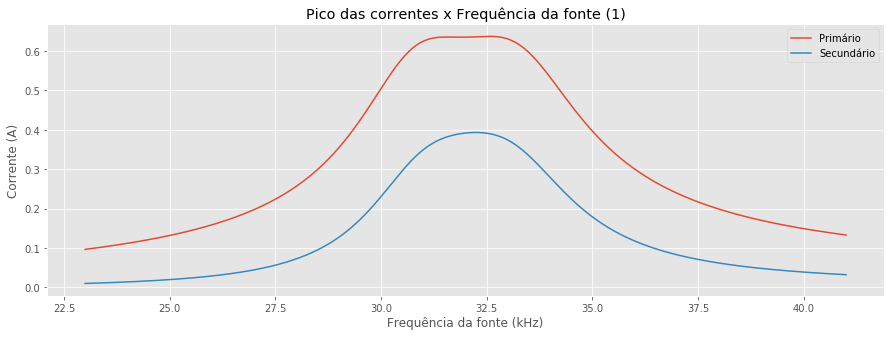

In [5]:
lista_i1 = []
lista_i2 = []
freq_lista = np.linspace(23e3, 41e3, 100000) #valores de frequência da fonte
k = 0.1 #coeficiente de acoplamento

for freq in freq_lista:

    wf = 2*pi*freq   # frequência da fonte em rad/s
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    lista_i1.append(abs(i1))  #abs fornece o pico 
    lista_i2.append(abs(i2))

figura = plt.figure(figsize=(15,5))
plt.style.use('ggplot')
fig1 = figura.add_subplot(1,1,1)

fig1.set_title("Pico das correntes x Frequência da fonte (1)")
fig1.plot(freq_lista/1e3, lista_i1, label="Primário");
fig1.plot(freq_lista/1e3, lista_i2, label="Secundário");
fig1.set_xlabel("Frequência da fonte (kHz)")
fig1.set_ylabel("Corrente (A)")
fig1.legend()
plt.show()

In [6]:
print(max(lista_i2))

0.3932768569940013


> O gráfico acima evidencia que o funcionamento do WPT relembra o de um transformador, pois há indução de corrente elétrica no secundário quando há corrente no primário, comportamento típico de um sistema com bobinas. O fato da corrente no primário possuir sempre um valor de pico mais alto que no secundário está de acordo com o funcionameto típico de um transformador, uma vez que a indução de fluxo magnético, proveniente do primário, na bobina do secundário eleva a corrente no primário. Comprova-se assim que a diferença de potencial aplicada no primário gera uma corrente e um fluxo magnético, que, por sua vez, induz uma corrente no secundário, tornando possível a transferência de energia para a carga apesar da separação entre as bobinas.

> Nota-se também que os picos das correntes no primário e no secundário atingem valores máximos quando a frequência da fonte é próxima da frequência de ressonância natural calculada (aquela frequência que considera as resistências nulas, em um sistema ideal). Esse resultado faz sentido, visto que o sistema WPT simulado apresenta resistência (R) muito baixa. 

> Com isso, pode-se concluir resumidamente a partir do gráfico que um sistema WPT com um _k = 0.1_ funciona somente quando a frequência da fonte for próxima à frequência natural do sistema.

### Correntes em função do coeficiente de acoplamento

Também é interessante encontrar como o pico das correntes varia conforme o coeficiente de acoplamento _k_ varia entre 0 e 1. Para essa simulação, considera-se uma **frequência da fonte constante** e igual à frequência no pico de corrente do gráfico gerado acima.

In [7]:
# determinação da frequência em que ocorre o pico de corrente no secundário:

f_pico = freq_lista[lista_i2.index(max(lista_i2))]
print("Frequência da fonte para quando a corrente é máxima no secundário: {:.2f} kHz".format(f_pico/1000))

Frequência da fonte para quando a corrente é máxima no secundário: 32.24 kHz


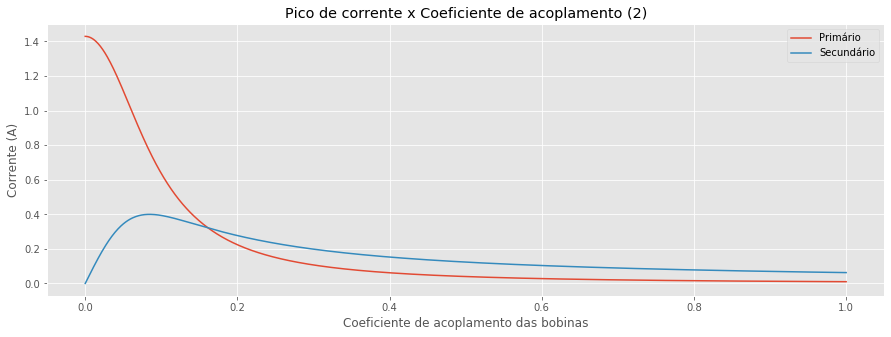

In [8]:
# cálculo das correntes em função de k

wf = 2*pi*f_pico  # frequência da fonte em rad/s
k_lista = np.linspace(0,1,1000)
lista_i1k = []
lista_i2k = []

for k in k_lista:
    
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    lista_i1k.append(abs(i1))  #abs fornece o pico 
    lista_i2k.append(abs(i2))

figura = plt.figure(figsize=(15,5))
fig1 = figura.add_subplot(1,1,1)
fig1.set_title("Pico de corrente x Coeficiente de acoplamento (2)")
fig1.plot(k_lista, lista_i1k, label="Primário");
fig1.plot(k_lista, lista_i2k, label="Secundário");
fig1.set_xlabel("Coeficiente de acoplamento das bobinas")
fig1.set_ylabel("Corrente (A)")
fig1.legend()
plt.show()

> O gráfico _"Pico de corrente x Coeficiente de acoplamento"_ mostra que, para uma frequência da fonte igual à frequência em que ocorre o pico máximo de corrente do gráfico anterior, a corrente máxima ocorre quando _k_é igual àquele adotado para determinar a frequência de ressonância da fonte no prmimeiro gráfico. 

## Construção de gráficos de potência e eficiência
<div id="pot"></div>

A grandeza que de fato representa a quantidade de energia tranferida para o secundário é a potência real. Ela pode ser calculada a partir da seguinte equação:

<img src="img\pot.png" width=600>

É preciso então calcular a tensão eficaz no secundário antes de utilizar a equação 2. Como a equação 2 calcula a potência aparente, é preciso montar um código que retorne a potência real, que é o que interessa.

### Potência e eficiência em função da frequência

Para calcular os valores de potência em função a frequência da fonte, foi reutilizado o código que calcula as correntes em função da frequência. Calculou-se também a eficiência do sistema, considerando que ela representa o ganho de potência e é um bom indicativo da qualidade da transmissão.

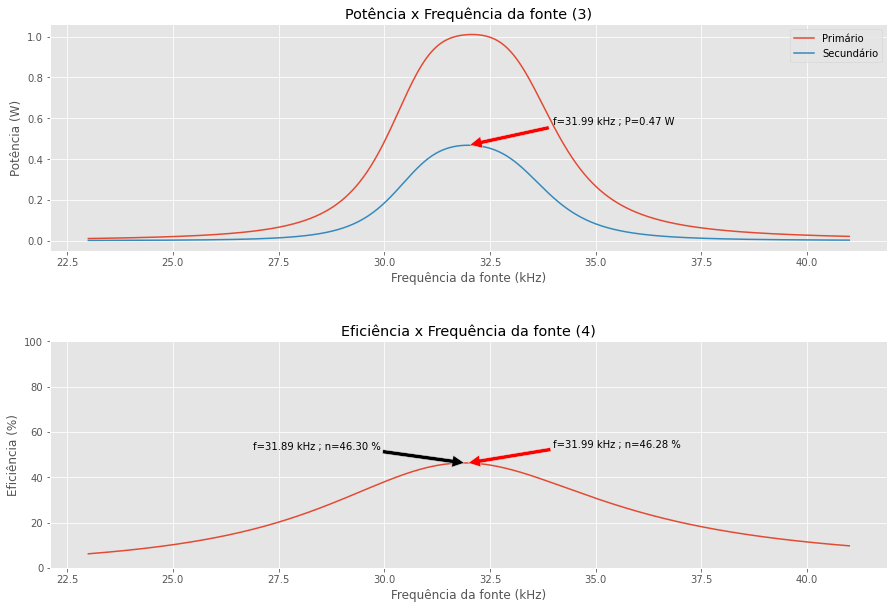

In [9]:
# potência em função da frequência

P1_lista = []
P2_lista = []

k = 0.1 #coeficiente de acoplamento

for freq in freq_lista:

    wf = 2*pi*freq  #frequência angular da fonte (rad/s)
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    V2 = Zeq*i2   #tensão no secundário
    
    P1 = 0.5*Uf*i1.conjugate()   #aplicação da equação 2 no primário
    P1_lista.append(np.real(P1))
    
    P2 = 0.5*V2*i2.conjugate()   #aplicação da equação 2 no secundário
    P2_lista.append(np.real(P2))

n_lista = [a*100/b for a,b in zip(np.real(P2_lista),np.real(P1_lista))]  #lista de eficiência

figura = plt.figure(figsize=(15,10))
figura.subplots_adjust(hspace=0.4)
fig1 = figura.add_subplot(2,1,1)
fig2 = figura.add_subplot(2,1,2)
plt.style.use('ggplot')

fig1.set_title("Potência x Frequência da fonte (3)")
fig1.plot(freq_lista/1e3, P1_lista, label="Primário");
fig1.plot(freq_lista/1e3, P2_lista, label="Secundário");
fig1.set_xlabel("Frequência da fonte (kHz)")
fig1.set_ylabel("Potência (W)")
fig1.legend()

P2max = max(P2_lista)
fpos1 = np.where(P2_lista == P2max)
fmax = freq_lista[fpos1][0]/1000
fig1.annotate('f={0:.2f} kHz ; P={1:.2f} W'.format(fmax,P2max), xy=(fmax, P2max), xytext=(fmax+2, P2max+0.1),
arrowprops=dict(facecolor='red', shrink=0.02))

fig2.set_title("Eficiência x Frequência da fonte (4)")
fig2.plot(freq_lista/1e3, n_lista);
fig2.set_xlabel("Frequência da fonte (kHz)")
fig2.set_ylabel("Eficiência (%)")
fig2.set_ylim((0,100))

nmax = max(n_lista)
fpos2 = np.where(n_lista == nmax)
fmax2 = freq_lista[fpos2][0]/1000
fig2.annotate('f={0:.2f} kHz ; n={1:.2f} %'.format(fmax2,nmax), xy=(fmax2, nmax), xytext=(fmax2-5, nmax+6),
arrowprops=dict(facecolor='black', shrink=1))

n2 = n_lista[fpos1[0][0]]
fig2.annotate('f={0:.2f} kHz ; n={1:.2f} %'.format(fmax,n2), xy=(fmax, n2), xytext=(fmax+2, n2+7),
arrowprops=dict(facecolor='red', shrink=1))

plt.show()

> Assim como nos gráficos das correntes, a maior potência transferida ao secundário se encontra na faixa próxima da frequência natural calculada, o que está de acordo com a informação de que nessa região também ocorre a maior corrente no secundário (mais corrente, mais potência para a carga acoplada no secundário). Vale ressaltar a seguinte fórmula: Potência = Tensão x Corrente; para uma tensão Uf constante, quanto maior a potência, maior será a corrente (por isso o formato dos gráficos é igual).

> Desse modo, para complementar, o gráfico da eficiência demonstra que os melhores resultados se encontram na parte em que a potência entregue pelo primário é significativamente maior, pois assim se consegue entregar mais energia para o secundário. A potência no secundário acompanha, de certo modo, a potência no primário. No entanto, é importante notar que a frequência para a qual ocorre a maior eficiência não é a mesma daquela para a qual ocorre a maior potência no secundário, pois a eficiência, sendo o ganho de potência, depende da razão entre as duas potências, e não dos seus valores absolutos.

### Potência e eficiência em função do coeficiente de acoplamento

Processo análogo pode ser feito para a gerar os gráficos da potência e da eficiência em função de diferentes valores de k.

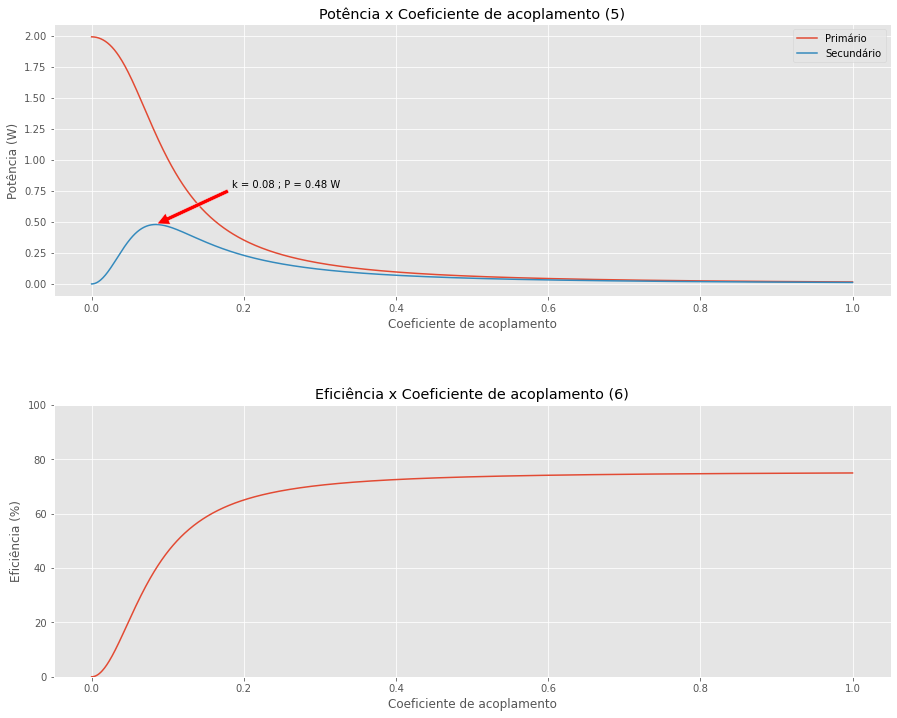

In [10]:
wf = 2*pi*f_pico  #frequência angular da fonte (rad/s)
P1_listak = []
P2_listak = []
for k in k_lista:
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    V2 = Zeq*i2 
    
    P1 = 0.5*Uf*i1.conjugate()
    P1_listak.append(np.real(P1))
    
    P2 = 0.5*V2*i2.conjugate()
    P2_listak.append(np.real(P2))

n_listak = [i*100/j for i,j in zip(np.real(P2_listak),np.real(P1_listak))]  #lista de eficiência

ymax = max(P2_listak)
xpos = np.where(P2_listak == ymax)
xmax = k_lista[xpos][0]

figura = plt.figure(figsize=(15,12))
figura.subplots_adjust(hspace=0.4)
fig1 = figura.add_subplot(2,1,1)
fig2 = figura.add_subplot(2,1,2)
plt.style.use('ggplot')

fig1.annotate('k = {0:.2f} ; P = {1:.2f} W'.format(xmax,ymax), xy=(xmax, ymax), xytext=(xmax+0.1, ymax+0.3),
arrowprops=dict(facecolor='red', shrink=0.02))

fig1.set_title("Potência x Coeficiente de acoplamento (5)")
fig1.plot(k_lista, P1_listak, label="Primário");
fig1.plot(k_lista, P2_listak, label="Secundário");
fig1.set_xlabel("Coeficiente de acoplamento")
fig1.set_ylabel("Potência (W)")
fig1.legend()

fig2.set_title("Eficiência x Coeficiente de acoplamento (6)")
fig2.plot(k_lista, n_listak)
fig2.set_xlabel("Coeficiente de acoplamento")
fig2.set_ylabel("Eficiência (%)")
fig2.set_ylim((0,100))

plt.show()

> O gráfico _"Potência x Coeficiente de acoplamento"_ revela que a máxima potência transmitida ocorre no mesmo valor de k para o qual ocorre a corrente máxima, no gráfico _"Pico de corrente x Coeficiente de acoplamento"_. Como a potência é determinada pela corrente, conforme Equação 2, vale a mesma explicação dada anteriormente sobre o comportamento desses gráficos.

> O gráfico _"Eficiência x Coeficiente de acoplamento"_ indica que a eficiência do sistema aumenta com alta taxa de variação até _k ~= 0,1_ e depoios establiza em um valor constante. Fisicamente, isso significa que, para os parâmetros do sistema e a frequência de ressonância utilizados no código que gera os gráficos acima, a aproximação das bobinas do primário e do secundário promove uma melhor eficiência. No entanto, isso não significa que quanto mais próximas estiverem as bobinas maior será a transferência de potência ao secundário; basta olhar o gráfico de _"Potência x Coeficiente de acoplamento"_ para notar isso.

## Gráficos adicionais
<div id="add"></div>

### Potência e eficiência em função da resistência da carga (Rc)

Também é interessante entender, para *k* e *f* constantes, como a potência e a eficiência do WPT variam conforme a resistência da carga.

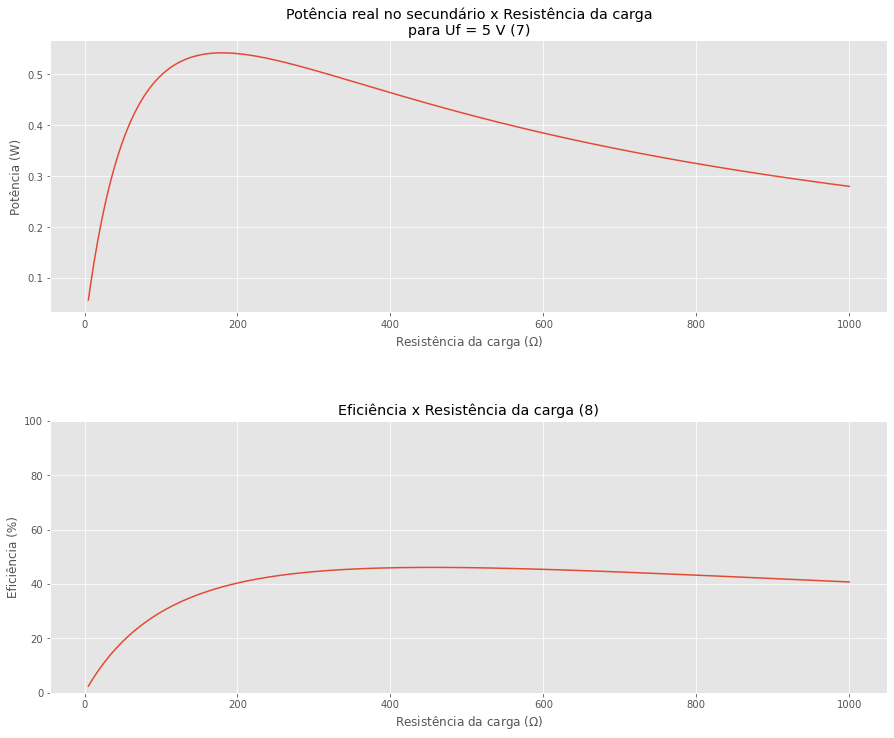

In [11]:
wf = 2*pi*f_pico
k = 0.1
Rc_lista = np.linspace(5,1000,1000)
P1_listaR = []
P2_listaR = []

for Rc in Rc_lista:
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    V2 = Zeq*i2
    
    P1 = 0.5*Uf*i1.conjugate()
    P1_listaR.append(np.real(P1))
    P2 = 0.5*V2*i2.conjugate()
    P2_listaR.append(np.real(P2))
    
n_listaR = [i*100/j for i,j in zip(np.real(P2_listaR),np.real(P1_listaR))]  #lista de eficiência

figura = plt.figure(figsize=(15,12))
plt.style.use('ggplot')
fig1 = figura.add_subplot(2,1,1)
fig2 = figura.add_subplot(2,1,2)

figura.subplots_adjust(hspace=0.4)

fig1.set_title("Potência real no secundário x Resistência da carga\npara Uf = 5 V (7)")
fig1.plot(Rc_lista, P2_listaR);
fig1.set_xlabel("Resistência da carga ($\Omega$)")
fig1.set_ylabel("Potência (W)")

fig2.set_title("Eficiência x Resistência da carga (8)")
fig2.plot(Rc_lista, n_listaR);
fig2.set_xlabel("Resistência da carga ($\Omega$)")
fig2.set_ylabel("Eficiência (%)")
fig2.set_ylim((0,100))

plt.show()

Os gráficos acima permitem entender que um dispositivo WPT funciona bem para determinado interval de resistências de carga. Aumentando a tensão de entrada, o comportamento muda.

### Potência em função da frequência para diferentes coeficientes de acoplamento

Para entender mais a fundo o comportamento do sistema, podem-se gerar gráficos conclusivos da potência e da eficiência em função da frequência da fonte para alguns valores de _k_. 

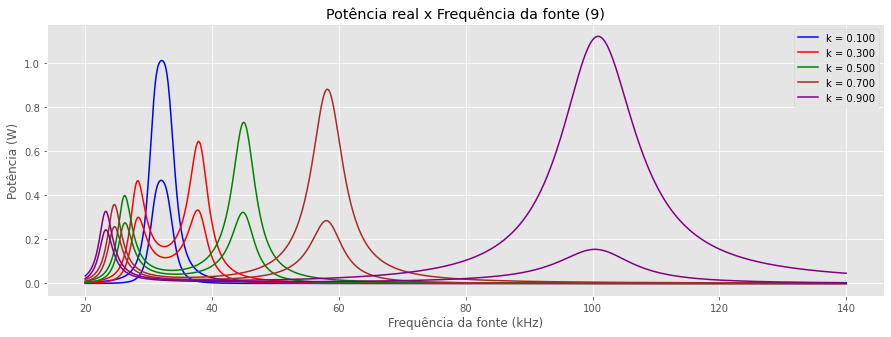

In [12]:
freq_lista = np.linspace(20e3, 140e3, 1000) #valores de frequência da fonte
k_lista = np.arange(0.1,1.1,0.2)
Rc = 400 #ohms

P1_listalistafk = []
P2_listalistafk = []

for k in k_lista:
    P1_listafk = []
    P2_listafk = []
    n_listafk  = []
    
    for f in freq_lista:
        wf = 2*pi*f  #frequência angular da fonte (rad/s)
        
        i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
        V2 = Zeq*i2

        P1 = 0.5*Uf*i1.conjugate()
        P1_listafk.append(np.real(P1))
        P2 = 0.5*V2*i2.conjugate()
        P2_listafk.append(np.real(P2))

    P1_listalistafk.append(P1_listafk)
    P2_listalistafk.append(P2_listafk)

figura = plt.figure(figsize=(15,12))
plt.style.use('ggplot')
fig1 = figura.add_subplot(2,1,1)

figura.subplots_adjust(hspace=0.4)
    
fig1.set_title("Potência real x Frequência da fonte (9)")

cm = ["blue","red","green", "brown", "purple"]
    
a = 0
for lista in P2_listalistafk:
    c = cm[a]
    fig1.plot(freq_lista/1000, lista, color=c, label="k = {:.3f}".format(k_lista[a]));
    fig1.plot(freq_lista/1000, P1_listalistafk[a], color=c);
    a+=1

fig1.set_xlabel("Frequência da fonte (kHz)")
fig1.set_ylabel("Potência (W)")
fig1.legend()

plt.show()

> O gráfico 9 permite inferir que, quando o valor de k é maior que 0,1, a frequência de ressonância do sistema não é única, mas separada em dois picos. Isso é um comportamento interessante, pois indica que a aproximação das bobinas (aumento do coeficiente de acoplamento) altera a frequência de oscilação do sistema não é mais a frequência natural de ressonância. Isso pode ser visualizado por meio do acionamento de um motor elétrico: conforme as bobinas se aproximam, a frequência do gerador de sinais deve aumentar para que o motor funcione.

### Potência em função da frequência para diferentes coeficientes de acoplamento variando entre 0.05 e 0.11

O gráfico 9 deu a entender que se o coeficiente de acoplamento estiver em torno de 0,1, o gráfico de potência pode apresentar apenas um pico em torno da frequência natural de ressonância do sistema. Assim, vale plotar um gráfico semelhante ao anterior mas limitando os valores de _k_ entre 0,05 e 0,11.

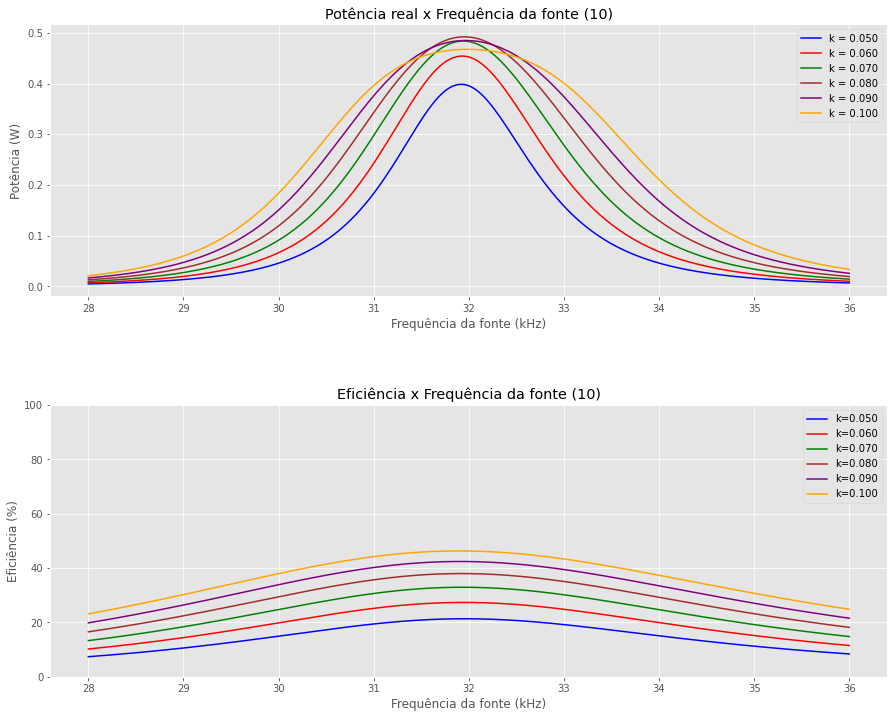

In [13]:
freq_lista = np.linspace(28e3, 36e3, 1000) #valores de frequência da fonte
k_lista = np.arange(0.05,0.11,0.01)
Rc = 400 #ohms

P1_listalistafk = []
P2_listalistafk = []
n_listalistafk  = []

for k in k_lista:
    P1_listafk = []
    P2_listafk = []
    n_listafk  = []
    
    for f in freq_lista:
        wf = 2*pi*f  #frequência angular da fonte (rad/s)
        
        i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
        V2 = Zeq*i2

        P1 = 0.5*Uf*i1.conjugate()
        P1_listafk.append(np.real(P1))
        P2 = 0.5*V2*i2.conjugate()
        P2_listafk.append(np.real(P2))
        
        n = 100*(np.real(P2)/np.real(P1))
        n_listafk.append(n)
        
    P1_listalistafk.append(P1_listafk)
    P2_listalistafk.append(P2_listafk)
    n_listalistafk.append(n_listafk)

figura = plt.figure(figsize=(15,12))
plt.style.use('ggplot')
fig1 = figura.add_subplot(2,1,1)
fig2 = figura.add_subplot(2,1,2)

figura.subplots_adjust(hspace=0.4)
    
fig1.set_title("Potência real x Frequência da fonte (10)")

cm = ["blue","red","green", "brown", "purple", "orange", "black", "yellow"]
    
a = 0
for lista in P2_listalistafk:
    c = cm[a]
    fig1.plot(freq_lista/1000, lista, color=c, label="k = {:.3f}".format(k_lista[a]));
    a+=1

fig1.set_xlabel("Frequência da fonte (kHz)")
fig1.set_ylabel("Potência (W)")
fig1.legend()

fig2.set_title("Eficiência x Frequência da fonte (10)")

a = 0
for lista in n_listalistafk:
    c = cm[a]
    fig2.plot(freq_lista/1000, lista, color=c, label="k={:.3f}".format(k_lista[a]));
    a+=1
    
fig2.set_xlabel("Frequência da fonte (kHz)")
fig2.set_ylabel("Eficiência (%)")
fig2.set_ylim((0,100))
fig2.legend()


plt.show()

> O gráfico 10 mostra que a maior potência no secundário se dá para um _k = 0.050_, dentre os valores utilizados. Além disso, pode-se subentender que quanto menor o coeficiente de acoplamento, mais a frequência da fonte que promove o máximo de potência fica próxima da frequência natural de ressonância, fazendo com que haja somente um pico.

## Gráficos de validação pós-experimento
<div id="valid"></div>

Os gráficos gerados nesta seção foram feitos para validar o modelo a partir dos dados coletados nos experimentos. A frequência de oscilação utilizada no experimento foi de **32,37 kHz**, pois foi um valor calculado anteriormente na Etapa 1. Apesar de ser diferente da frequência de ressonância simulada, acredita-se que isso não prejudica a validação do modelo, uma vez que a diferença é mínima.

### Validação com a tensão no secundário

Durante o experimento, a medição de tensão de pico foi feita por um osciloscópio. Para cada distância, anotou-se um valor de tensão máxima diferente, conforme tabela a seguir:

<img src="img\tabela_exp.png" width=300>

De modo a validar o modelo, pode-se construir um gráfico simulado de tensão no secundário em função do coeficiente de acoplamento e, para cada valor de tensão de pico medida, encontrar o k correspondente.

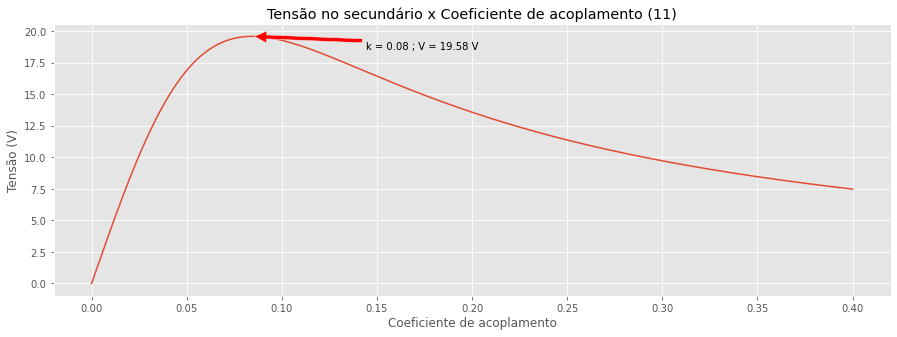

In [14]:
wf = 2*pi*f_pico  # frequência da fonte em rad/s
k_lista = np.linspace(0,0.4,10000)
V2_lista = []

for k in k_lista:
    
    i1, i2, Zeq = CalcularWPT(Uf, Rc, R, wf, k)
    V2 = Zeq*i2
    V2_lista.append(abs(V2))

figura = plt.figure(figsize=(15,5))
plt.style.use('ggplot')
fig1 = figura.add_subplot(1,1,1)

ymax = max(V2_lista)
xpos = np.where(V2_lista == ymax)
xmax = k_lista[xpos][0]

fig1.annotate('k = {0:.2f} ; V = {1:.2f} V'.format(xmax,ymax), xy=(xmax, ymax), xytext=(xmax+0.06, ymax-1),
arrowprops=dict(facecolor='red', shrink=0.02))

fig1.set_title("Tensão no secundário x Coeficiente de acoplamento (11)")
fig1.plot(k_lista, V2_lista)
fig1.set_xlabel("Coeficiente de acoplamento")
fig1.set_ylabel("Tensão (V)")

plt.show()

Com o gráfico acima, podem ser coletados visualmente os valores de k e guardá-los em uma lista:

In [15]:
V_lista_exp = [11.6, 16.3, 17.9, 19.7, 19.1, 14.9, 11, 7.6, 4.8, 3.4, 2.4, 2.2]
k_lista_exp = [0.27, 0.17, 0.13, 0.08, 0.07, 0.038, 0.026, 0.02, 0.015, 0.011, 0.009, 0.006]
d_lista_exp = [10,15,20,23,25,35,45,55,65,75,85,90]

Com as listas da distância e do coeficiente de acoplamento, pode-se entender a relação entre os dois por meio de um gráfico:

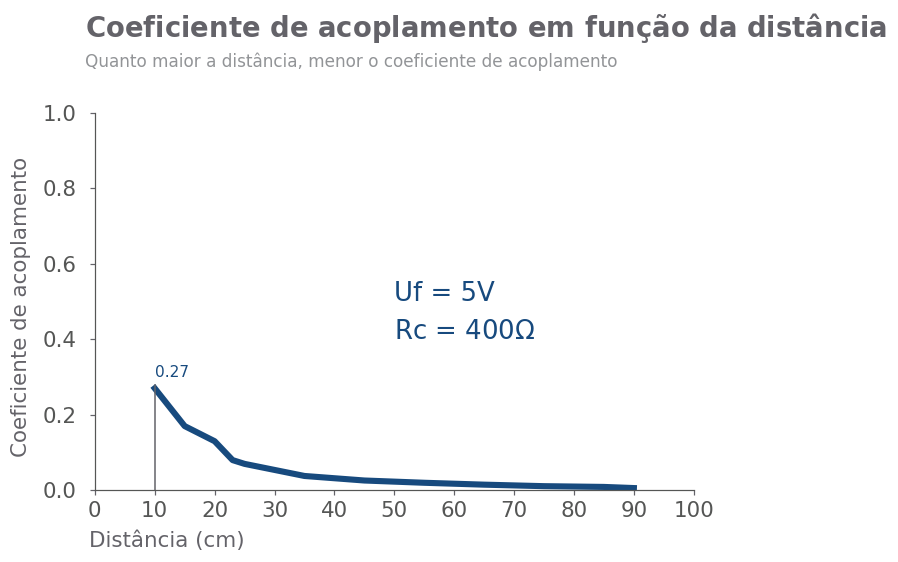

In [16]:
plt.style.use('default')

GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
# Criando uma figura nova
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=110)
# Ajustando o subplot
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
# Linha do Ticket 1
ax1.plot(d_lista_exp, k_lista_exp, linewidth=4, color=BLUE1)
# Limites dos eixos
ax1.set_xlim([0, 100])
ax1.set_ylim([0, 1])
# Propriedades dos eixos
plt.setp(ax1,
         xticks=np.arange(0,110,10),
         xticklabels=np.arange(0,110,10),
         yticks=np.arange(0,1.2,step=0.2))
# X e Y tick aparência
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY3)
# Movendo eixo y
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
# Mudando a aparência no geral
ax1.tick_params(bottom='off')
# Trocando cores de spines
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY3)
ax1.spines['left'].set_color(GRAY3)
# Removendo bordas
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# Legendando diretamente
ax1.text(50, 0.5, 'Uf = 5V', fontsize='17', color=BLUE1)
ax1.text(50, 0.4, 'Rc = 400$\Omega$', fontsize='17', color=BLUE1)
# Título do eixo
ax1.text(-1, -0.15, 'Distância (cm)', fontsize=14, color=GRAY4)
ax1.text(-14, 0.1, 'Coeficiente de acoplamento', fontsize=14, rotation='vertical', color=GRAY4)
# Título do gráfico
ax1.text(-1.6, 1.2, '$\\bf{Coeficiente \ de \ acoplamento \ em \ função \ da \ distância}$',
         fontsize=18, color=GRAY4)
ax1.text(-1.6, 1.12, 'Quanto maior a distância, menor o coeficiente de acoplamento',
         fontsize=11, color=GRAY7)
plt.axvline(x=10, ymax=0.28, color='#636369', linewidth=1)
ax1.text(10, 0.3,'0.27',fontsize=10, color=BLUE1, linespacing=1.4)

plt.show()

>O gráfico acima permite concluir que a relação entre o coeficiente de acoplamento e a distância é inversamente proporcional. Isso faz sentido, pois quanto menor a distância, maior a influência da indutância mútua M no sistema WPT, logo, maior deve ser o valor de k.

Por fim, para efetivamente validar o modelo, plota-se um gráfico de dispersão em cima do gráfico _Tensão no secundário x Coeficiente de acoplamento_:

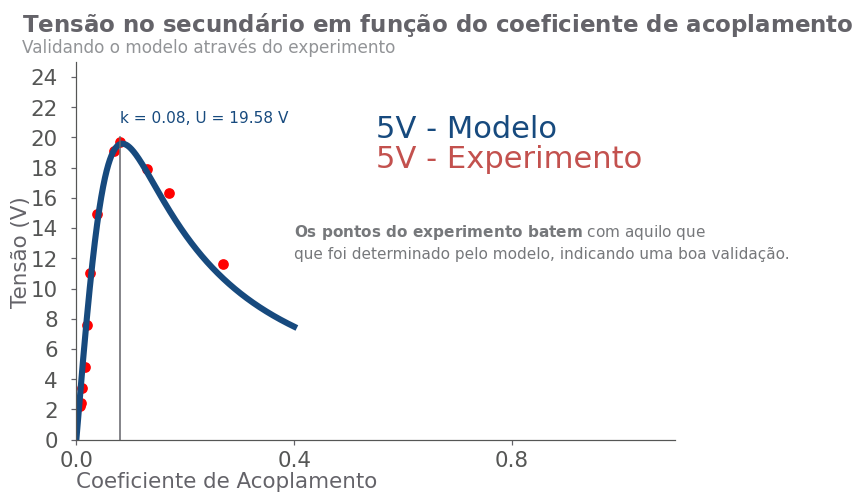

In [17]:
# Criando uma figura nova
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=110)             
# Ajustando o subplot
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
# Linha do Ticket 1
ax1.plot(k_lista, V2_lista, linewidth=4, color=BLUE1)
plt.scatter(k_lista_exp, V_lista_exp, color="red")
# Limites dos eixos
ax1.set_xlim([0, 1.1])
ax1.set_ylim([0, 25])
# Propriedades dos eixos
plt.setp(ax1,
         xticks=np.arange(0,1.1,0.4),
         xticklabels=np.arange(0,1.1,0.4),
         yticks=np.arange(0,25,step=2))
# X e Y tick aparência
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY3)
# Movendo eixo y
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
# Mudando a aparência no geral
ax1.tick_params(bottom='off')
# Trocando cores de spines
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY3)
ax1.spines['left'].set_color(GRAY3)
# Removendo bordas
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# Legendando diretamente
ax1.text(0.55, 20, '5V - Modelo', fontsize=20, color=BLUE1)
ax1.text(0.55, 18, '5V - Experimento', fontsize=20, color=RED1)
# Título do eixo
ax1.text(0, -3.2, 'Coeficiente de Acoplamento', fontsize=14, color=GRAY4)
ax1.text(-0.12, 9, 'Tensão (V)', fontsize=14, rotation='vertical', color=GRAY4)
ax1.axvline(x=0.08, ymax=0.8, color='#636369', linewidth=1)
# Título do gráfico
ax1.text(-0.1, 27, '$\\bf{Tensão \ no \ secundário \ em \ função \ do \ coeficiente \ de \ acoplamento }$',
         fontsize=15, color=GRAY4)
ax1.text(-0.1, 25.6, 'Validando o modelo através do experimento',
         fontsize=11, color=GRAY7)
ax1.text(0.4, 12,
'$\\bf{Os\ pontos\ do \ experimento\ batem}$ com aquilo que \n'
'que foi determinado pelo modelo, indicando uma boa validação.',
fontsize=10, color=GRAY5, linespacing=1.4)
ax1.text(0.08, 21,'k = 0.08, U = 19.58 V',fontsize=10, color=BLUE1, linespacing=1.4)

plt.show()

### Resultados de potência para diferentes tensões e cargas

Além da tabela mostrada anteriormente, também foram feitas medições com tensão de entrada igual a 10 V e resistência de carga igual a 1 k$\Omega$, conforme tabela abaixo:

<img src="img\tabela_exp_2.png" width=300>

Os dois resultados podem ser mostrados em um gráfico, o que permite entender que variando valores de Uf e Rc pode-se obter maiores potências e maiores distâncias.

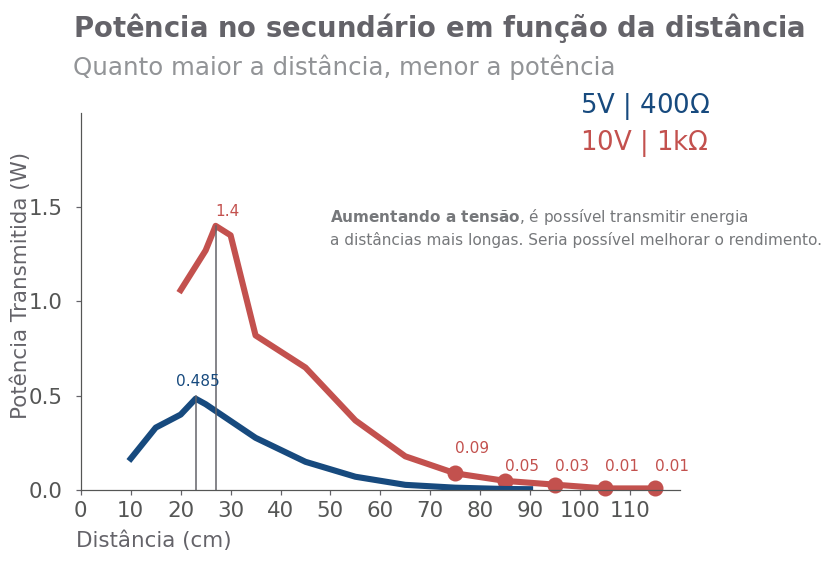

In [18]:
plt.style.use('default')


#5V e 400 ohms
lista_tensao = [11.6,16.3,17.9,19.7,19.1,14.9,11,7.6,4.8,3.4,2.4,2.2]
lista_pot = [0.168, 0.332 , 0.401 ,0.485 ,0.456 ,0.278 ,0.151 ,0.072 ,0.029 ,0.014 ,0.007 ,0.006]
lista_pico = [23.5, 32,36.2,39.6,38.6,30.2,22.5,15.7,10.1,7.2,5.2,4]
lista_dist = [10,15,20,23,25,35,45,55,65,75,85,90]



#10V e 1000 ohms
lista_tensaoII = [46,50.4,52.9,52,40.4,36,27.1,19.1,13.5,10.2,8,5,3.6]
lista_picoII = [93,103,108,105,102,74,55,39,28,22,16.3,5.2,7.6]
lista_potII = [1.06,1.27,1.40,1.35,0.82,0.65,0.37,0.18,0.09,0.05,0.03,0.01,0.01]
lista_distII = [20,25,27,30,35,45,55,65,75,85,95,105,115]

# Criando uma figura nova
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=110)

# Ajustando o subplot
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# Linha do Ticket 1
ax1.plot(lista_dist, lista_pot, linewidth=4, color=BLUE1)

# Desenhando a linha do ticket 2
ax1.plot(lista_distII, lista_potII, linewidth=4, color=RED1)
ax1.scatter(lista_distII[-5:], lista_potII[-5:], s=90, color=RED1, clip_on=False)

# Limites dos eixos
ax1.set_xlim([0, 120])
ax1.set_ylim([0, 2])

# Propriedades dos eixos
plt.setp(ax1,
xticks=np.arange(0,120,10),
xticklabels=np.arange(0,120,10),
yticks=np.arange(0,2,step=0.5))

# X e Y tick aparência
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY3)

# Movendo eixo y
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Mudando a aparência no geral
ax1.tick_params(bottom='off')

# Trocando cores de spines
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY3)
ax1.spines['left'].set_color(GRAY3)

# Removendo bordas
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Legendando diretamente
ax1.text(100, 2, '5V | 400$\Omega$', fontsize='17', color=BLUE1)
ax1.text(100, 1.8, '10V | 1k$\Omega$', fontsize='17', color=RED1)

# Título do eixo
ax1.text(-1, -0.3, 'Distância (cm)', fontsize=14, color=GRAY4)
ax1.text(-14, 0.4, 'Potência Transmitida (W)', fontsize=14, rotation='vertical', color=GRAY4)

# Título do gráfico
ax1.text(-1.6, 2.4, '$\\bf{Potência \ no \ secundário \ em \ função \ da \ distância}$',
fontsize=18, color=GRAY4)
ax1.text(-1.6, 2.2, 'Quanto maior a distância, menor a potência',
fontsize=16, color=GRAY7)

ax1.text(75, 0.2,'0.09',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(85, 0.1,'0.05',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(95, 0.1,'0.03',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(105, 0.1,'0.01',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(115, 0.1,'0.01',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(19, 0.55,'0.485',fontsize=10, color=BLUE1, linespacing=1.4)
ax1.text(27, 1.45,'1.4',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(50, 1.3,
'$\\bf{Aumentando\ a\ tensão}$, é possível transmitir energia\na distâncias mais longas. '
'Seria possível melhorar o rendimento.',
fontsize=10, color=GRAY5, linespacing=1.4)
plt.axvline(x=23, ymax=0.25, color='#636369', linewidth=1)
plt.axvline(x=27, ymax=0.7, color='#636369', linewidth=1)

plt.show()

### Resultados de tensão no secundário para diferentes Uf e Rc

Abaixo, mostra-se o gráfico de tensão no secundário para duas diferentes tensões de alimentação e resistência de carga

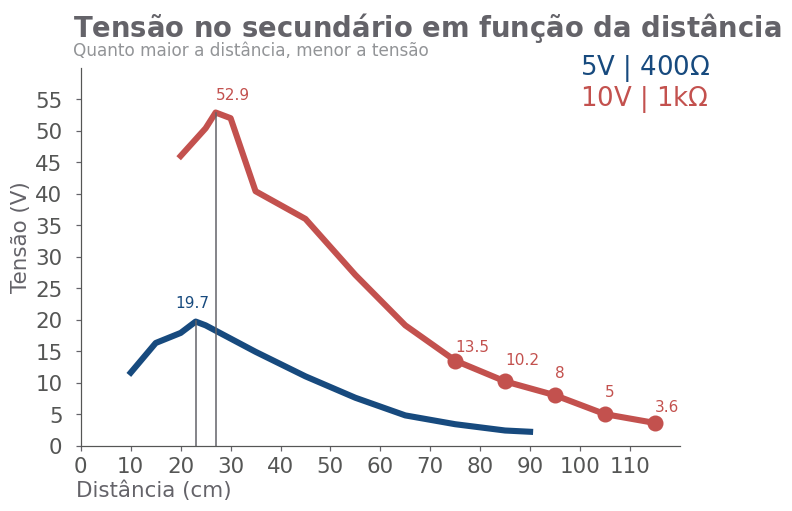

In [19]:
# Criando uma figura nova
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=110) 

# Ajustando o subplot
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# Linha do Ticket 1
ax1.plot(lista_dist, lista_tensao, linewidth=4, color=BLUE1)

# Desenhando a linha do ticket 2 
ax1.plot(lista_distII, lista_tensaoII, linewidth=4, color=RED1)
ax1.scatter(lista_distII[-5:], lista_tensaoII[-5:], s=90, color=RED1, clip_on=False)

# Limites dos eixos
ax1.set_xlim([0, 120])
ax1.set_ylim([0, 60])

# Propriedades dos eixos
plt.setp(ax1,
         xticks=np.arange(0,120,10),
         xticklabels=np.arange(0,120,10),
         yticks=np.arange(0,60,step=5))

# X e Y tick aparência
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY3)
    
# Movendo eixo y
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
    
# Mudando a aparência no geral
ax1.tick_params(bottom='off')

# Trocando cores de spines
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY3)
ax1.spines['left'].set_color(GRAY3)

# Removendo bordas
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Legendando diretamente
ax1.text(100, 59, '5V | 400$\Omega$ ', fontsize='17', color=BLUE1)
ax1.text(100, 54, '10V | 1k$\Omega$', fontsize='17', color=RED1)

# Título do eixo
ax1.text(-1, -8, 'Distância (cm)', fontsize=14, color=GRAY4)
ax1.text(-14, 25, 'Tensão (V)', fontsize=14, rotation='vertical', color=GRAY4)

# Título do gráfico
ax1.text(-1.6, 65, '$\\bf{Tensão \ no \ secundário \ em \ função \ da \ distância}$',
         fontsize=18, color=GRAY4)
ax1.text(-1.6, 62, 'Quanto maior a distância, menor a tensão',
         fontsize=11, color=GRAY7)
ax1.text(75, 15,'13.5',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(85, 12.9,'10.2',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(95, 10.9,'8',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(105, 7.9,'5',fontsize=10, color=RED1, linespacing=1.4)
ax1.text(115, 5.5,'3.6',fontsize=10, color=RED1, linespacing=1.4)
plt.axvline(x=23, ymax=0.33, color='#636369', linewidth=1)
plt.axvline(x=27, ymax=0.88, color='#636369', linewidth=1)
ax1.text(19, 22,'19.7',fontsize=10, color=BLUE1, linespacing=1.4)
ax1.text(27, 55,'52.9',fontsize=10, color=RED1, linespacing=1.4)

plt.show()

## Conclusões e comentários
<div id="conclusao"></div>

Analisando os resultados obtidos tanto na simulação quando no experimento e comparando-os, pôde-se perceber e validar algumas características significativas para a ideação e construção de um dispositivo com a tecnologia WPT.

Primeiramente, em relação à frequência de ressonância natural de um circuito LC, onde considera-se dissipação de energia nula, pôde-se validar que a frequência de ressonância ideal obtida na simulação é bastante próxima de tal valor. Isso é relevante pois leva à conclusão de que o cálculo da frequência de ressonância natural é uma boa aproximação para se obter a frequência de ressonância ideal, a qual é mais complicada de se obter, tendo em vista que precisa-se de simulações que levem em consideração a dissipação de energia (R1 e R2).

Outrossim, ao passo que foram obtidos experimentalmente os valores de tensão no secundário x distância entre as bobinas, foram percebidas diferenças relevantes entre os valores máximos de tensão no experimento com os valores de tensão na simulação. Isso acontece pois inicialmente a simulação foi feita utilizando apenas as resistências das bobinas. No entanto, esse valor de resistência não é acurado, pois na construção do dispositivo, considera-se também impedâncias relacionadas a aspectos contrutivos do sistema, como soldas e jumpers. Assim, aumentou-se o valor da resistência, tendo em vista os valores máximos de tensão obtidos experimentalmente até que os valores experimentais e simulados fossem bastante próximos. Desse modo, analisando o gráfico de validação, pôde-se validar o experimento já que os valores estão bastante próximos. Com isso, foi possível relacionar o k ideal obtido na simulação (k = 0,08) e a distância ideal obtida no experimento (d = 23,5cm). E, em função de tal processo de validação, foi possível obter uma relação entre os coeficientes de acoplamento com as distâncias entre as bobinas.

Por fim, ao realizar o experimento com o motor elétrico, foi possível concluir que para cada coeficiente de acoplamento existe uma frequência de ressonância ideal para se obter a maior potência no secundário, assim como explicitado no gráfico 9. Ou seja, no experimento, ao passo que as bobinas eram aproximadas ou afastadas, era preciso alterar a frequência de oscilação do gerador de sinais para maximizar a potência no motor.

## Referências
<div id="referencias"></div>

#### Introdução:
- <a href="https://en.wikipedia.org/wiki/Wireless_power_transfer"> Wikipedia - Wireless Power Transfer </a>
- <a href="https://en.wikipedia.org/wiki/Resonant_inductive_coupling"> Wikipedia - Resonant Inductive Coupling </a>

#### Cálculo da frequência natural de ressonância de um circuito LC
- <a href="https://www.youtube.com/watch?v=r72f0ZZusT0"> Resonant Frequency of LC Circuits - Physics (YouTube) </a>

#### Código do modelo numérico
- Aula sobre transformadores - Eletromagnetismo e Ondulatória Insper

#### Referências de código
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html"> Inserir anotações em gráficos </a>
- <a href="https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings"> Ignorar Warnings inconvenientes ao rodar código </a>
- <a href="https://www.storytellingwithdata.com/"> Storytelling with Data - Cole Nussbaumer Knaflic </a>